#### Program Name: music-recommender.ipynb
#### Purpose: recommends music genre to people based on their gender and age.
#### Author: Momodou Jallow

---------------------------------------------------------------------------------------------------------------------------

### Problem Statement
Create a music recommender system to a person based on their age and gender using the music data.

#### Import the dependencies

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#### Data Collection and Processing

In [68]:
music_data = pd.read_csv("music.csv")

In [69]:
# Display the first 5 rows
music_data.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [70]:
# Number of rows and columns in the data
music_data.shape

(18, 3)

In [71]:
# number of values in the gender column
music_data["gender"].value_counts()

1    9
0    9
Name: gender, dtype: int64

There are equal amount of 1's and 0's in the data namely nine. Where 1 represents male and 0 represents female.

In [72]:
# number of values in the genre column
music_data["genre"].value_counts()

Classical    6
HipHop       3
Jazz         3
Dance        3
Acoustic     3
Name: genre, dtype: int64

The genre column has six different values the highest of which is Classical.

In [73]:
# check for missing values
music_data.isnull().sum()

age       0
gender    0
genre     0
dtype: int64

<Axes: >

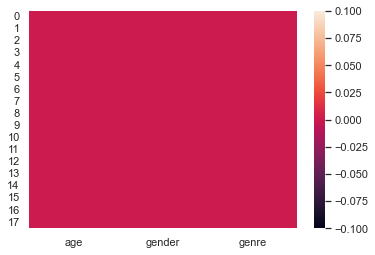

In [74]:
sns.heatmap(music_data.isnull())

There are no missing values in the dataset

#### Label Encoding

In [75]:
# Change the values in genre column to numeric data type
music_data.replace({"genre":{"Classical":0, "HipHop":1, "Jazz":2, "Dance":3, "Acoustic":4}},
                  inplace = True)

In [76]:
music_data.head()

,age,gender,genre
0,20,1,1
1,23,1,1
2,25,1,1
3,26,1,2
4,29,1,2


In [77]:
# Separating data and label
X = music_data.drop(columns = 'genre', axis = 1)
y = music_data['genre']

#### Train Test Split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

#### Model Instantiation and Training

In [79]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)

SVC(kernel='linear')

#### Model Evaluation

In [80]:
# accuracy on training data
X_train_prediction = clf.predict(X_train)
training_data_accuracy_score = accuracy_score(y_train, X_train_prediction)
training_data_accuracy_score

0.9285714285714286

In [81]:
# accuracy on test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy_score = accuracy_score(y_test, X_test_prediction)
test_data_accuracy_score

1.0

Since the accuracy score on the test data is not very different from the accuracy score on the training data, the model is very good.

#### Building a Recommender System

In [82]:
input_data = (23,1)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1, -1)
predictions = clf.predict(input_data)
if(predictions[0]== 0):
    print("They like Classical.")
elif(predictions[0] == 1):
    print("They like HipHop.")
elif(predictions[0]== 2):
    print("They like Jazz.")
elif(predictions[0]== 3):
    print("They like Dance.")
else:
    print("They like Acoustic.")

They like HipHop.
